In [4]:
pip install empath

Note: you may need to restart the kernel to use updated packages.


In [5]:
from empath import Empath
lexicon = Empath()

### score means number of words in the input text that match the words associated with that category

In [6]:
lexicon.analyze("he hit the other person", categories=["violence"])
# => {'violence': 1.0}

{'violence': 1.0}

### Normalize: divide by the total number of words in the text

In [7]:
lexicon.analyze("he hit the other person", categories=["violence"], normalize=True)
# => {'violence': 0.2}

{'violence': 0.2}

### Fail to connect with external server

In [ ]:
#lexicon.create_category("colors",["red","blue","green"])
# => ["blue", "green", "purple", "purple", "green", "yellow", "red", "grey", "violet", "gray", "blue", "orange", "white", "pink", "yellow", "black", "brown", "brown", "red", "aqua", "turquoise", "blue_color", "colored", "color", "same_shade", "violet", "gray", "grey", "teal", "nice_shade", "coloured", "forest_green", "colored", "different_shade", "colour", "sparkly", "reddish", "beautiful_shade", "greenish", "indigo", "darker_shade", "emerald", "lovely_shade", "tints", "crimson", "dark_purple", "pink", "emerald", "sapphire", "golden", "lighter_shade", "lime_green", "coloured", "bright", "same_color", "specks", "red", "golden_color", "different_shades", "chocolate_brown", "orange", "bluish", "green", "deep_purple", "magenta", "green_color", "dark_shade", "bright_orange", "milky", "lilac", "light_brown", "sparkling", "golden_brown", "silvery", "baby_blue", "blood_red", "pink", "teal", "blue", "yellowish", "turquoise", "same_colour", "sparkly", "aquamarine", "black_color", "white", "cerulean", "perfect_shade", "dark", "speckled", "charcoal", "greyish", "midnight_blue", "emerald_green", "deep_brown", "ocean_blue", "flecks", "amber", "pinkish", "jet_black"]

#lexicon.analyze("My favorite color is blue", categories=["colors"], normalize=True)
# => {'colors': 0.4}

# Trial 1: one paragraph

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd

# Perform sentiment analysis
result = lexicon.analyze(
    "Despite decades of scientific consensus on the importance of urgent climate action, a significant subset of global citizens continues to be doubtful, even dismissive of climate change science. Among these, there has lately been a growing contingent – individuals who have not necessarily declared allegiance to the contrarian side en masse, but instead display scattered, piecemeal scepticism on this increasingly pressing issue. Weary to unravel the complexities surrounding their doubt-some views, The NZ Herald initiated an in-depth inquiry; endeavouring to delve deeper and dispel the haze enveloping understanding of climate change amongst New Zealand communities.", 
    normalize=True
)

# Convert results to a pandas DataFrame
df = pd.DataFrame(list(result.items()), columns=['Category', 'Score'])

# Filter for scores greater than 0
filtered_df = df[df['Score'] > 0.0]

# Sort the DataFrame by the Score column in descending order
sorted_df = filtered_df.sort_values(by='Score', ascending=False)

# Display the sorted DataFrame
print(sorted_df)


             Category     Score
8                cold  0.031579
103           weather  0.031579
136            warmth  0.031579
3               money  0.021053
25         government  0.021053
58       irritability  0.010526
101          sympathy  0.010526
105             trust  0.010526
114        politeness  0.010526
35             school  0.010526
127              gain  0.010526
132           science  0.010526
151          politics  0.010526
156        technology  0.010526
158    shape_and_size  0.010526
163         terrorism  0.010526
175         messaging  0.010526
192  positive_emotion  0.010526


# Trial 2.1: dataset of twitter posts on climate change from Kaggle - tweet by tweet

In [9]:
import pandas as pd

# Load the dataset of Twitter posts
df_tweets = pd.read_csv('twitter_sentiment_data.csv')

# Sample 100 tweets from the dataset
df_sample = df_tweets.sample(1000)

# Create an empty list to hold the raw analysis results
analysis_results = []

# Loop through each tweet and analyze it using Empath
for tweet in df_sample['message']:  
    result = lexicon.analyze(tweet, normalize=True)
    
    # Append the result (raw analysis) to the results list
    analysis_results.append(result)

# Convert the raw results to a DataFrame and filter out categories with score 0
all_data = []  # List to hold the final data for DataFrame

for tweet, result in zip(df_sample['message'], analysis_results):
    # Convert the result into a DataFrame
    temp_df = pd.DataFrame(list(result.items()), columns=['Category', 'Score'])
    
    # Filter out categories with score 0
    filtered_df = temp_df[temp_df['Score'] > 0.0]
    
    # Sort the filtered DataFrame by Score in descending order
    sorted_df = filtered_df.sort_values(by='Score', ascending=False)
    
    # Add a new column 'Tweet' to the sorted DataFrame for the corresponding tweet text
    sorted_df['Tweet'] = tweet
    
    # Append the sorted DataFrame to the all_data list
    all_data.append(sorted_df)

# Concatenate all individual DataFrames into one
final_df = pd.concat(all_data, ignore_index=True)

# save the results to a CSV file
final_df.to_csv('climate_change_analysis_results.csv', index=False)

# Display the final result
print(final_df.head(20))



      Category     Score                                              Tweet
0      cooking  0.100000  Climate change: Why beef is the new SUV (Opini...
1       eating  0.100000  Climate change: Why beef is the new SUV (Opini...
2         hate  0.125000  RT @IFOAMorganic: Smallholder farmers are suff...
3        money  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
4         cold  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
5   aggression  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
6    suffering  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
7        death  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
8     violence  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
9      neglect  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
10     weather  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
11      warmth  0.062500  RT @IFOAMorganic: Smallholder farmers are suff...
12     sadne

# Trial 2.2: dataset of twitter posts on climate change from Kaggle - aggregated scores of all the post text

In [7]:
import pandas as pd

# Load the dataset of Twitter posts
df_tweets = pd.read_csv('twitter_sentiment_data.csv')

df_sample = df_tweets.sample(1000)  # Sampling 100 tweets for the analysis

# Create an empty dictionary to hold the total scores for each category
total_scores = {}

# Loop through each tweet and analyze it using Empath
for tweet in df_sample['message']:  
    result = lexicon.analyze(tweet, normalize=False)
    
    # Convert the result into a DataFrame and filter out categories with score 0
    temp_df = pd.DataFrame(list(result.items()), columns=['Category', 'Score'])
    filtered_df = temp_df[temp_df['Score'] > 0.0]
    
    # Add the scores to the total_scores dictionary
    for category, score in filtered_df.values:
        if category in total_scores:
            total_scores[category] += score  # Accumulate the score for each category
        else:
            total_scores[category] = score  # Initialize the score for new category

# Convert the total_scores dictionary into a DataFrame
aggregated_df = pd.DataFrame(list(total_scores.items()), columns=['Category', 'Total_Score'])

# Sort the DataFrame by Total_Score in descending order and get the top 20 categories
top_20_df = aggregated_df.sort_values(by='Total_Score', ascending=False).head(20)
aggregated_df.to_csv('climate_change_analysis_aggregated_results.csv', index=False)
# Display the top 20 topics
print(top_20_df)


             Category  Total_Score
5              warmth        912.0
4             weather        756.0
2                cold        747.0
0               money        570.0
25         government        286.0
27          terrorism        250.0
21   negative_emotion        149.0
15              fight        103.0
30           speaking        101.0
9             dispute        100.0
28      communication         88.0
148          business         85.0
63          deception         83.0
16                war         83.0
11               kill         81.0
8          aggression         71.0
7              giving         68.0
52             school         64.0
62             divine         64.0
13           violence         64.0


# Word Cloud

In [ ]:
pip install wordcloud

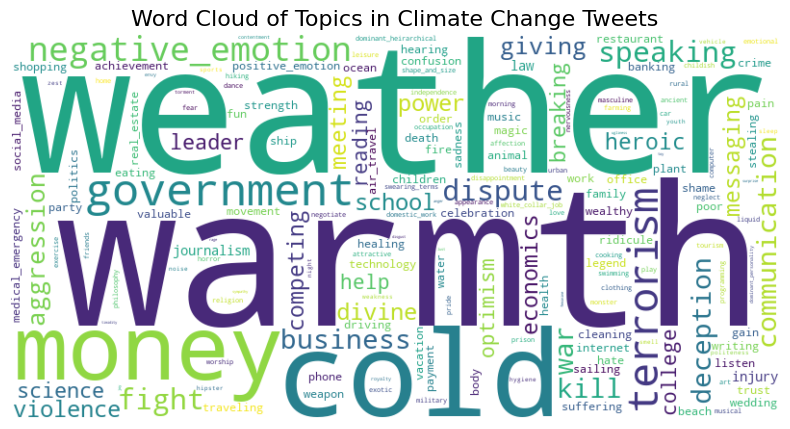

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the aggregated_df into a dictionary for the word cloud
word_cloud_data = dict(zip(aggregated_df['Category'], aggregated_df['Total_Score']))

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(word_cloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for better visualization
plt.title('Word Cloud of Topics in Climate Change Tweets', fontsize=16)
plt.show()


# Trial 3 Comparison of NZ Herald news on climate change v.s. LLM generated ones

In [ ]:
import os
import pandas as pd
from empath import Empath

# Initialize the Empath lexicon
lexicon = Empath()

# Function to analyze text data using Empath and aggregate normalized scores
def analyze_texts_in_directory_normalized(directory_path):
    total_scores = {}
    
    # Iterate over all text files in the directory
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        
        # Check if the file is a text file
        if os.path.isfile(file_path) and file_name.endswith('.txt'):
            with open(file_path, 'r', encoding='utf-8') as file:
                texts = file.readlines()
                
            # Loop through each line and analyze using Empath
            for text in texts:
                result = lexicon.analyze(text.strip(), normalize=False)
                
                # Filter out categories with score 0 and aggregate scores
                for category, score in result.items():
                    if score > 0.0:
                        total_scores[category] = total_scores.get(category, 0) + score

    # Calculate the total score for normalization
    total_score_sum = sum(total_scores.values())

    # Convert the total_scores dictionary into a DataFrame and normalize scores
    aggregated_df = pd.DataFrame(
        [(category, score, score / total_score_sum) for category, score in total_scores.items()],
        columns=['Category', 'Total_Score', 'Normalized_Score']
    )
    return aggregated_df

# Analyze both directories
llm_path = r'D:\dev\annotate\Automated-text-annotation\llm_generated_corpus'
human_path = r'D:\dev\annotate\Automated-text-annotation\human_authored_corpus'

aggregated_llm = analyze_texts_in_directory_normalized(llm_path)
aggregated_human = analyze_texts_in_directory_normalized(human_path)

# Merge results for comparison using normalized scores
comparison_df = pd.merge(
    aggregated_llm[['Category', 'Normalized_Score']].rename(columns={'Normalized_Score': 'LLM_Normalized_Score'}),
    aggregated_human[['Category', 'Normalized_Score']].rename(columns={'Normalized_Score': 'Human_Normalized_Score'}),
    on='Category',
    how='outer'
).fillna(0)

# Add a column for normalized score differences
comparison_df['Normalized_Score_Difference'] = (
    comparison_df['LLM_Normalized_Score'] - comparison_df['Human_Normalized_Score']
)

# Save the comparison results to CSV
comparison_df.to_csv('empath_normalized_comparison_results.csv', index=False)

# Display the comparison DataFrame sorted by the largest normalized score difference
print(comparison_df.sort_values(by='Normalized_Score_Difference', ascending=False))


     Category  LLM_Normalized_Score  Human_Normalized_Score  \
186   weather              0.050656                0.030960   
181    warmth              0.050443                0.032235   
27       cold              0.047606                0.029831   
65       gain              0.019581                0.009434   
116  optimism              0.010500                0.006483   
..        ...                   ...                     ...   
114     ocean              0.004576                0.008851   
143   sailing              0.003689                0.008013   
101     money              0.028131                0.032708   
120   payment              0.008833                0.019705   
177  valuable              0.009259                0.020579   

     Normalized_Score_Difference  
186                     0.019697  
181                     0.018209  
27                      0.017775  
65                      0.010148  
116                     0.004017  
..                           ... 